In [1]:
from geqo.algorithms import FaultTolerantTranspiler
from geqo.core import Sequence
from geqo.gates import PauliY, Rzz, Toffoli, SwapQubits,Rx
from geqo.simulators import unitarySimulatorCuPy
import numpy as np

In [2]:
transpiler = FaultTolerantTranspiler()

In [3]:
import numpy as np

random2 = Sequence(
    [0, 1, 2],
    [],
    [
        (PauliY(), [1], []),
        (Rzz("a"), [0, 2], []),
        (Toffoli(), [2, 1, 0], []),
        (SwapQubits(), [0, 2], []),
        (Rx("b"), [1], []),
    ],
)

sim = unitarySimulatorCuPy(3)
sim.setValue("a", 1.23)
sim.setValue("b", 4.56)
sim.prepareBackend([Toffoli()])
sim.apply(random2, [0, 1, 2])
u2 = sim.u

transpile_circuit = transpiler.transpile(u2)

First level decompositin done
decompose_mcu done
no precompute sequence


/home/chiatso/Git/geqo/src/geqo/algorithms/algorithms.py:1760: RuntimeWarning: invalid value encountered in divide
  ratio = U / decom  # calculate phase shift


level 2 gates added
decompose_mcu stage 1/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 2/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 3/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 4/33 done
decompose_mcu stage 5/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 6/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 7/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 8/33 done
decompose_mcu stage 9/33 done
decompose_mcu stage 10/33 done
decompose_mcu stage 11/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 12/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 13/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 14/33 done
decompose_mcu stage 15/33 done
decompose_mcu stage 16/33 done
decompose_mcu stage 17/33 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 18/33 done
decompose_mcu done
level 2 gates added
de

In [4]:
len(transpile_circuit.gatesAndTargets)

607

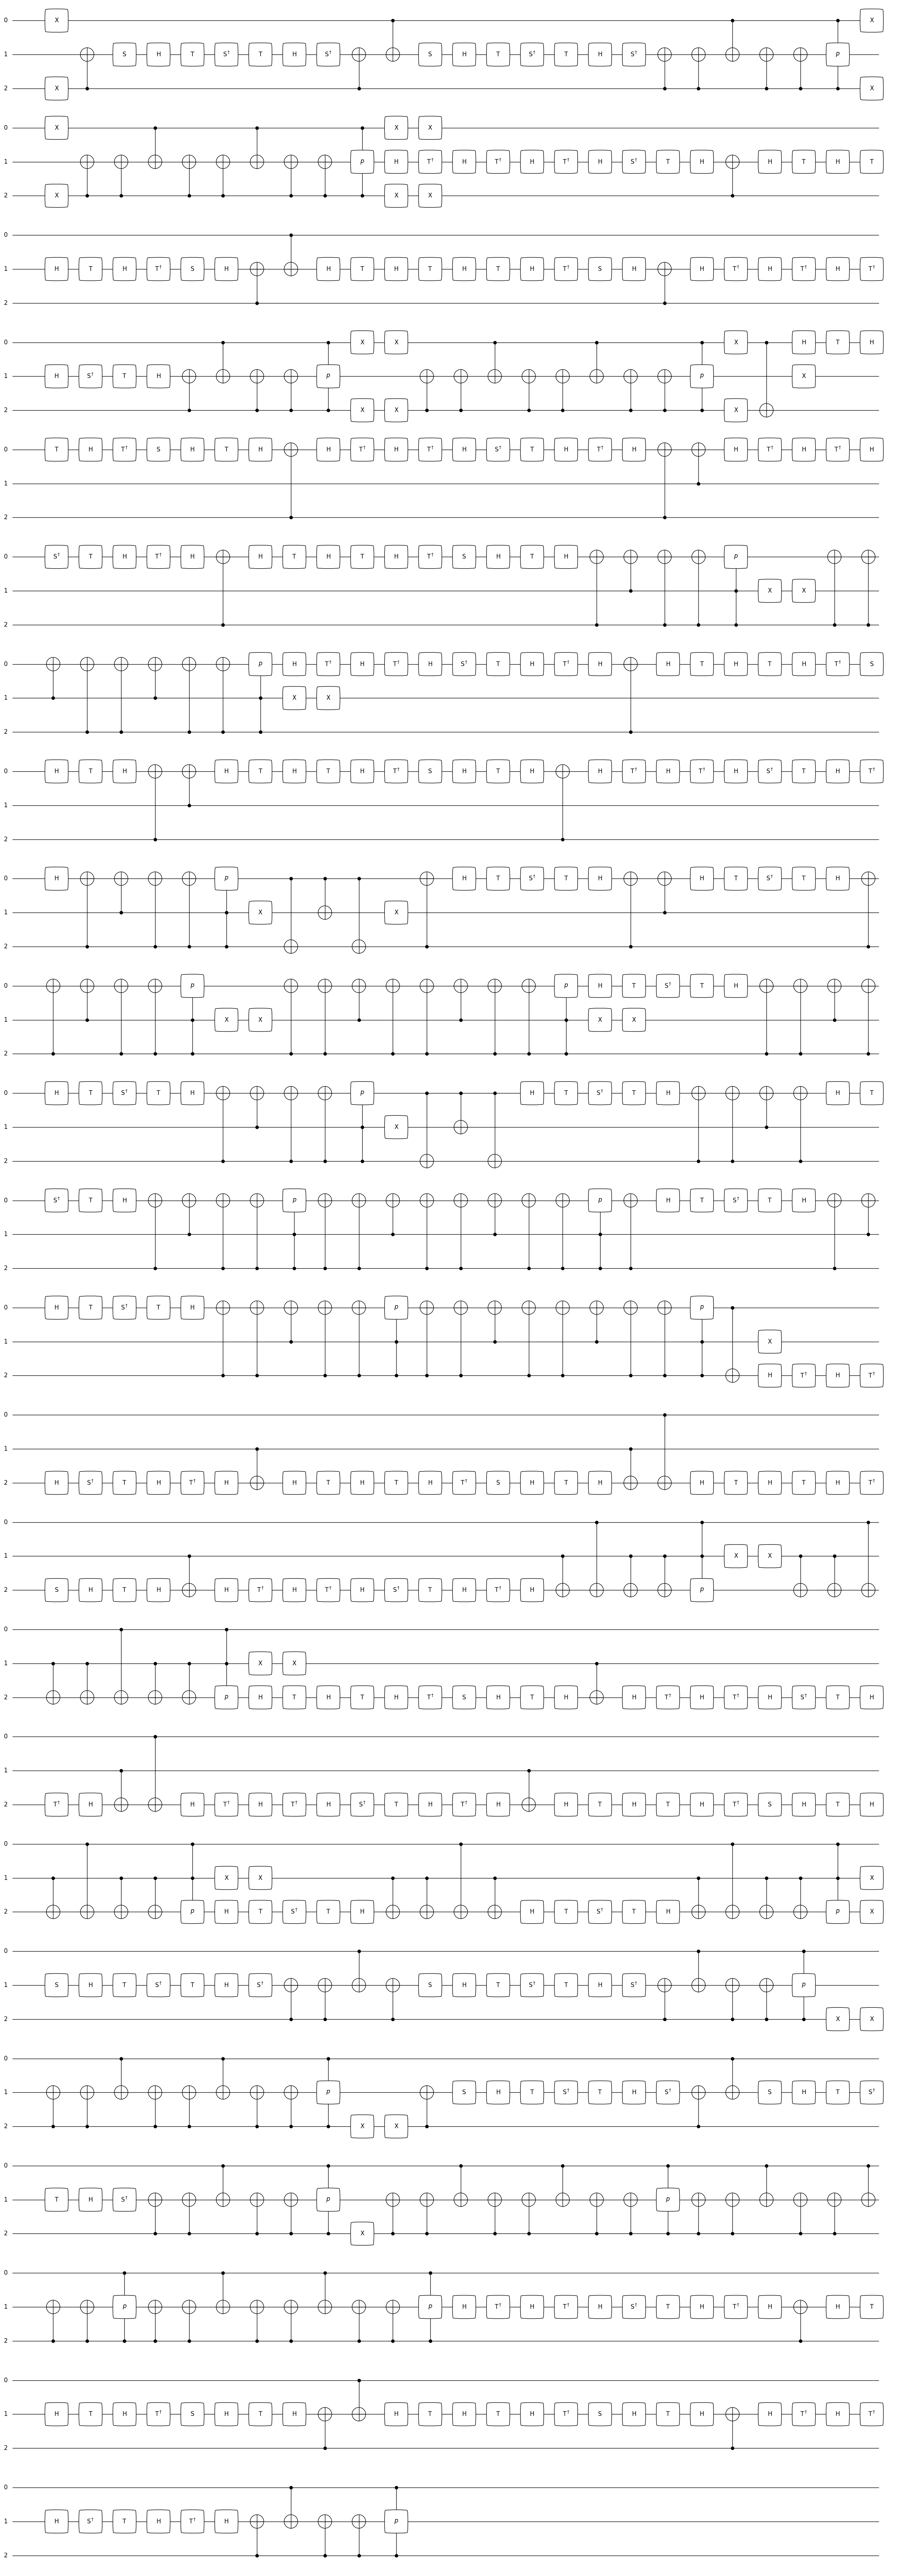

In [5]:
from geqo.visualization import plot_mpl
plot_mpl(transpile_circuit)

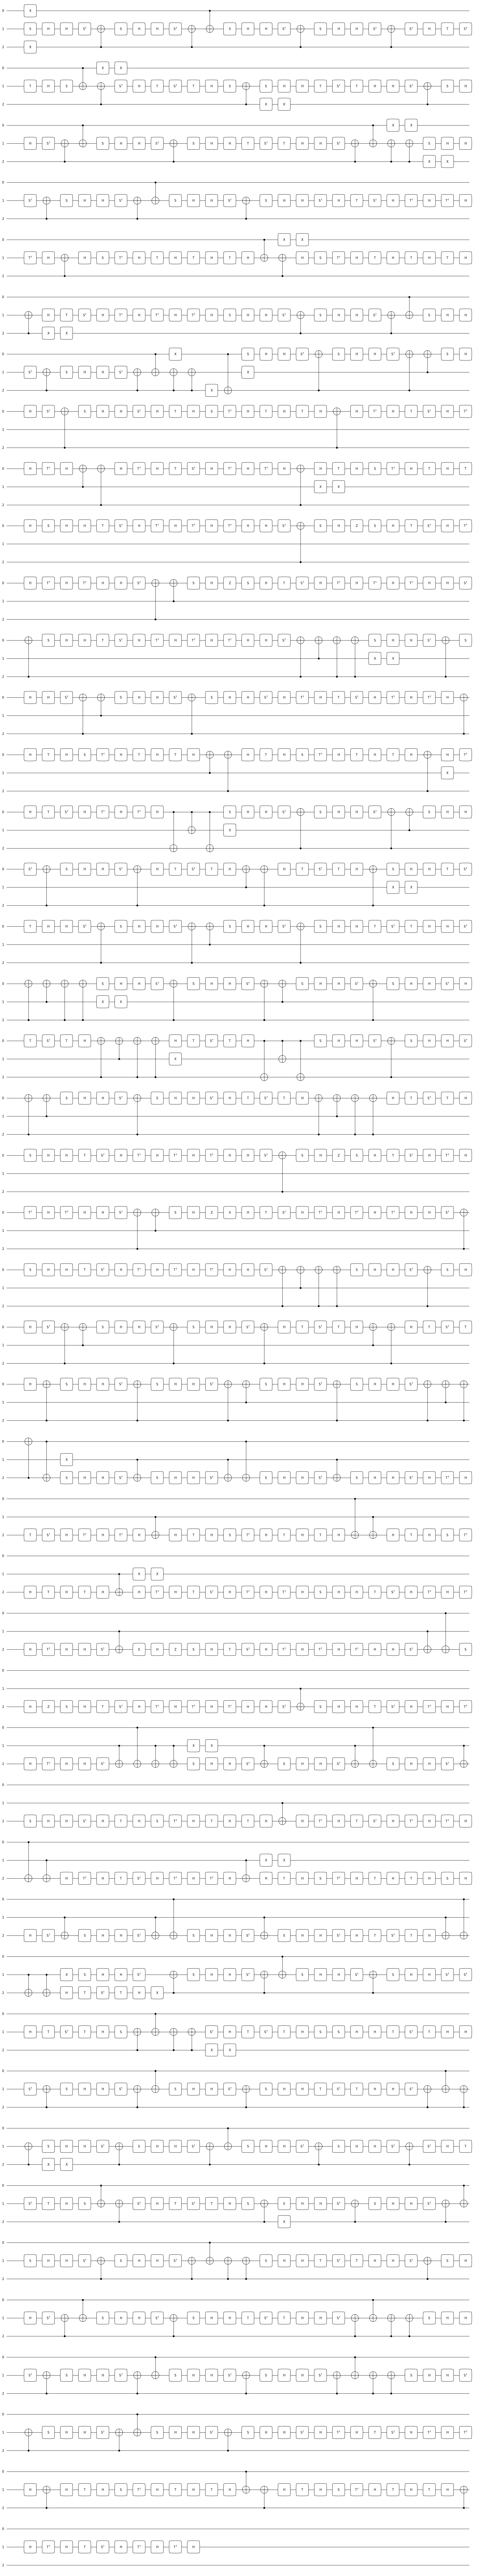

In [6]:
from geqo.visualization import plot_mpl
plot_mpl(transpile_circuit)

In [9]:
from geqo.gates import PauliX, CNOT, Hadamard,SGate
random1 = Sequence(
    [0, 1],
    [],
    [
        (PauliX(), [0], []),
        (PauliY(), [1], []),
        (Rzz("a"), [0, 1], []),
        (CNOT(), [1, 0], []),
        (Hadamard(), [1], []),
        (Hadamard(), [0], []),
        (SGate(), [0], []),
        (CNOT(), [0, 1], []),
        (SwapQubits(), [0, 1], []),
        (Rx("b"), [1], []),
    ],
)
sim = unitarySimulatorCuPy(2)
sim.setValue("a", 1.23)
sim.setValue("b", 4.56)
sim.apply(random1, [0, 1])
u = sim.u

transpile_circuit2 = transpiler.transpile(u)

First level decompositin done
decompose_mcu done
level 2 gates added
decompose_mcu stage 1/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 2/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 3/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 4/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 5/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 6/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 7/25 done
decompose_mcu stage 8/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 9/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 10/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 11/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 12/25 done
decompose_mcu stage 13/25 done
decompose_mcu stage 14/25 done
decompose_mcu done
level 2 gates added
decompose_mcu stage 15/25 done
decompose_mcu done
level 2 gates added
decompo

In [12]:
usim = unitarySimulatorCuPy(2)
usim.apply(transpile_circuit2, [0,1])
decom_u = usim.u
print(decom_u)
print(u)
print(transpiler.distance(decom_u,u))

[[-0.30919784-0.43969139j -0.6677931 +0.34879917j -0.13247396+0.0836282j
   0.33590939-0.07798428j]
 [-0.03014659+0.07436872j  0.03228997+0.28456362j -0.70666764-0.4246722j
  -0.237415  +0.41886735j]
 [-0.65664435+0.18048798j -0.14448531-0.55530489j -0.28571924+0.14266232j
  -0.26896408-0.18075693j]
 [ 0.26395644-0.41376073j -0.03713197+0.14054928j -0.12260104+0.42274378j
  -0.71457   -0.18341911j]]
[[-0.4067876 -0.57587035j -0.4067876 +0.57587035j -0.03105509+0.04396326j
  -0.03105509-0.04396326j]
 [ 0.04396326-0.03105509j -0.04396326-0.03105509j  0.57587035+0.4067876j
  -0.57587035+0.4067876j ]
 [ 0.4067876 +0.57587035j -0.4067876 +0.57587035j  0.03105509-0.04396326j
  -0.03105509-0.04396326j]
 [-0.04396326+0.03105509j -0.04396326-0.03105509j -0.57587035-0.4067876j
  -0.57587035+0.4067876j ]]
1.9595251388506485


In [6]:
usim = unitarySimulatorCuPy(3)
usim.apply(transpile_circuit, [0,1,2])
decom_u2 = usim.u
print("decom2:",decom_u2)
print("u2:",u2)
print(transpiler.distance(decom_u2,u2))
print(np.linalg.norm(u2 - decom_u2, ord=2))

Exception: Parameter p in BasicGate is undefined.

In [5]:
u2 / decom_u2

array([[ 1.61964612e-01+8.00282516e-01j, -0.00000000e+00-0.00000000e+00j,
         2.09060842e+00-1.73022624e+00j, -0.00000000e+00-0.00000000e+00j,
        -0.00000000e+00-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -0.00000000e+00-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-0.00000000e+00-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00-0.00000000e+00j, -0.00000000e+00-0.00000000e+00j,
         2.63391802e+01+1.86056666e+01j,  0.00000000e+00+0.00000000e+00j,
         3.46094044e+00+7.62892760e+00j,  0.00000000e+00+0.00000000e+00j],
       [-2.12762838e+00+1.50293001e+00j, -0.00000000e+00-0.00000000e+00j,
         7.00855746e-01+3.50848232e-01j,  0.00000000e+00+0.00000000e+00j,
        -0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        -0.00000000e+00-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [-0.00000000e+00-0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e

In [12]:
def gray_code_sequence(n):
    """Return list of integer masks of length 2^n representing Gray code."""
    return [i ^ (i >> 1) for i in range(1 << n)]
gray_list = gray_code_sequence(4)
from geqo.utils import num2bin, bin2num
gray_list = [num2bin(i,4) for i in gray_list]

In [15]:
gray_list

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 1, 0],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 0, 0],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 0],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 0, 0, 1],
 [1, 0, 0, 0]]

In [21]:
np.array([0,1,0])^np.array([1,1,0])

array([1, 0, 0])

In [26]:
def bit_flipped(a, b):
    """Assumes a and b differ by exactly one bit; return index of flipped bit (0 = LSB)."""
    diff = np.array(a) ^ np.array(b)
    return int(np.where(diff == 1)[0][0])

    #return (diff.bit_length() - 1)  # index of the single set bit (0 = LSB)
bit_flipped(gray_list[1],gray_list[2])

2

In [35]:
gray_list

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 1],
 [0, 1, 0],
 [1, 1, 0],
 [1, 1, 1],
 [1, 0, 1],
 [1, 0, 0]]

In [49]:
from geqo.utils import num2bin
from geqo.core import Sequence
from geqo.gates import CNOT, Rz
from geqo.simulators import unitarySimulatorCuPy

def gray_code_sequence(n):
    """Return list of integer masks of length 2^n representing Gray code."""
    return [i ^ (i >> 1) for i in range(1 << n)]

def bit_flipped(a, b):
    """Assumes a and b differ by exactly one bit; return index of flipped bit (0 = LSB)."""
    diff = np.array(a) ^ np.array(b)
    return int(np.where(diff == 1)[0][0])

n = 3
theta = np.pi/2

gray_list = gray_code_sequence(n)
gray_list = [num2bin(i,n) for i in gray_list]

op = []
params = {}
pivot = 0

for i in range(len(gray_list)-1):
    prev = gray_list[i]
    curr = gray_list[i+1]
    flipped_idx = bit_flipped(prev, curr)

    if flipped_idx != pivot:
        op.append((CNOT(), [flipped_idx, pivot]))

    size = sum(curr[j] for j in range(1,n))
    phi = - (theta / 2**(n-1)) * (-1)**size
    op.append((Rz(f"p{i}"), [pivot], []))
    params[f"p{i}"] = 2*phi  # <-- double the angle for GEQO Rz

    if flipped_idx != pivot:
        op.append((CNOT(), [flipped_idx, pivot]))

    print(f"step {i}: prev={prev}, curr={curr}, flipped={flipped_idx}, size={size}, phi={phi}")

seq = Sequence([*range(n)], [], op)
sim = unitarySimulatorCuPy(n)
sim.values = params
sim.apply(seq,[*range(n)])
np.diag(sim.u)

step 0: prev=[0, 0, 0], curr=[0, 0, 1], flipped=2, size=1, phi=0.39269908169872414
step 1: prev=[0, 0, 1], curr=[0, 1, 1], flipped=1, size=2, phi=-0.39269908169872414
step 2: prev=[0, 1, 1], curr=[0, 1, 0], flipped=2, size=1, phi=0.39269908169872414
step 3: prev=[0, 1, 0], curr=[1, 1, 0], flipped=0, size=1, phi=0.39269908169872414
step 4: prev=[1, 1, 0], curr=[1, 1, 1], flipped=2, size=2, phi=-0.39269908169872414
step 5: prev=[1, 1, 1], curr=[1, 0, 1], flipped=1, size=1, phi=0.39269908169872414
step 6: prev=[1, 0, 1], curr=[1, 0, 0], flipped=2, size=0, phi=-0.39269908169872414


array([0.92387953-0.38268343j, 0.92387953-0.38268343j,
       0.92387953-0.38268343j, 0.92387953-0.38268343j,
       0.92387953+0.38268343j, 0.92387953+0.38268343j,
       0.92387953+0.38268343j, 0.92387953+0.38268343j])

In [44]:
num2bin(3,3)

[0, 1, 1]

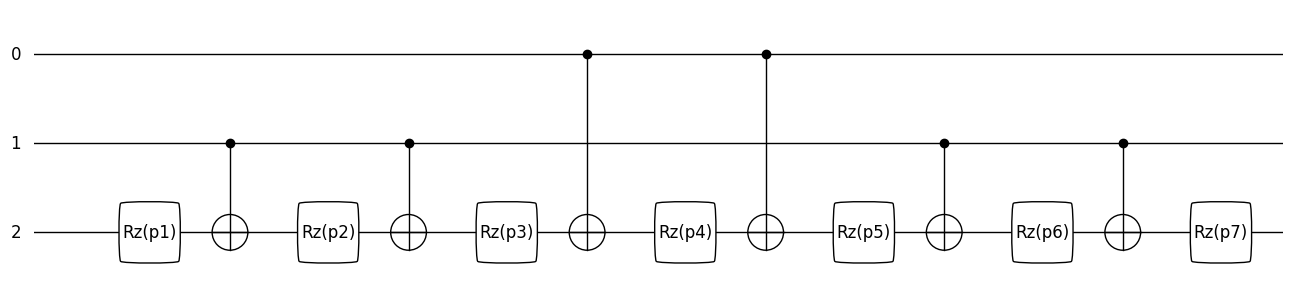

In [42]:
plot_mpl(seq)

In [82]:
import itertools
import numpy as np
def rz(angle):
            return np.array([[np.exp(-1j * angle / 2), 0], [0, np.exp(1j * angle / 2)]])
def rx(angle):
    return np.array(
        [
            [np.cos(angle / 2), -1j * np.sin(angle / 2)],
            [-1j * np.sin(angle / 2), np.cos(angle / 2)],
        ]
    )
def H(power):
    if power == 0:
        return np.eye(2)
    else:
        return 1/2**0.5*np.array([[1,1],[1,-1]])

In [4]:
rz(np.pi/2)*rz(np.pi/2)

array([[1.79380389e-16-1.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 1.79380389e-16+1.j]])

In [83]:
phases = np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]) 
phase_combo = list(itertools.product(phases, repeat=4))
H_powers = [0,1]
H_combo = list(itertools.product(H_powers, repeat=2))
len(phase_combo)


6561

In [28]:
phase_combo[0]

(np.float64(-1.0), np.float64(-1.0), np.float64(-1.0), np.float64(-1.0))

In [78]:
import numpy as np
theta = -2*np.pi/5
theta = -1*np.pi/5
[zpow, spow,delta], global_phase = Rz_angle_reduction(theta)
def Z(pow):
    if pow == 0:
        return np.eye(2,dtype=complex)
    else:
        z = np.array([[1,0],[0,-1]],dtype=complex)
        return z ** pow
def S(pow):
    if pow == 0:
        return np.eye(2,dtype=complex)
    else:
        s = np.array([[1,0],[0,1j]],dtype=complex)
        return s ** pow

est =  Z(zpow) @ S(spow) @ rz(delta) * global_phase
print(est)
print(rz(theta))

[[0.95105652+0.30901699j 0.        +0.j        ]
 [0.        +0.j         0.95105652-0.30901699j]]
[[0.95105652+0.30901699j 0.        +0.j        ]
 [0.        +0.j         0.95105652-0.30901699j]]


In [65]:
zpow

-1

In [42]:
rz(theta)

array([[0.58778525-0.80901699j, 0.        +0.j        ],
       [0.        +0.j        , 0.58778525+0.80901699j]])

In [ ]:
def Rz_angle_reduction(theta):
    """
    Decomposes an Rz(theta) gate.
    
    Finds non-negative integers k, l and angle delta in (-pi/4, pi/4]
    such that Rz(theta) is physically equivalent to Z^k @ S^l @ Rz(delta) times a global phase
    The global phase = e^(-1j * (theta - delta) / 2) bc Z^k S^l = P(k+l/2) = P(theta - delta)
    P(a) and Rz(a) gates differ by a phase e^(-1j a /2)

    This solves the 2-pi periodic equation:
    theta = k*pi + l*(pi/2) + delta (mod 2*pi)

    Returns: [k, l, delta], global_phase
    """
    
    # Normalize theta to the standard interval (-pi, pi]
    theta_norm = (theta + np.pi) % (2 * np.pi) - np.pi

    # Find the closest multiple of (pi/2). N_closest can be negative.
    # We solve theta_norm = N_closest * (pi/2) + delta
    N_closest = np.round(theta_norm / (np.pi / 2))
    
    # Calculate delta
    delta = theta_norm - N_closest * (np.pi / 2)

    # Find the smallest non-negative N that is equivalent to N_closest.
    # The Z and S gates are periodic every 4 units of (pi/2) 
    # (i.e., Z^2 = I, S^4 = I, so N is equivalent to N + 4m).
    # We use (N_closest % 4) to find the smallest non-negative N.
    N = int(N_closest % 4)

    # Decompose N into non-negative k and l.
    # We solve N = 2*k + l.
    k = int(N // 2)
    l = int(N % 2)

    # Calculate the correct global phase.
    global_phase = np.exp(-1j * (theta - delta) / 2)
    

    return [k, l, delta], global_phase

In [126]:
def initial_approximation(U):
    
    best_approx = H(0)
    best_params = [0]*6
    min_diff = np.sum(abs(best_approx-U))
    for phases in phase_combo:
        for powers in H_combo:
            rotations = rx(phases[0]*np.pi)
            for idx, p in enumerate(phases[1:]):
                if idx % 2 ==0:
                    rotations = rz(p*np.pi) @ rotations 
                else:
                    rotations = rx(p*np.pi) @ rotations 
            V = H(powers[1]) @ rotations @ H(powers[0])
            diff = np.sum(abs(V-U))

            if min_diff is None or diff < min_diff:
                min_diff = diff
                best_approx = V
                best_params = [powers[0]]+list(phases)+[powers[1]]
                
    print(f"best approximation diff = {min_diff}")
    print(f"best approximation matrix: {best_approx}")

    return best_params, best_approx

In [127]:
U = rz(3*np.pi/5)
params, approx = initial_approximation(U)

best approximation diff = 0.31383638291137955
best approximation matrix: [[ 7.07106781e-01-7.07106781e-01j  2.29934717e-17+2.29934717e-17j]
 [-7.17699910e-17-2.29934717e-17j  7.07106781e-01+7.07106781e-01j]]


In [128]:
params

[1, np.float64(-0.75), np.float64(-1.0), np.float64(0.75), np.float64(-1.0), 1]

In [129]:
params2, approx2 = initial_approximation(U @ approx.conj().T)
approx2 @ approx

best approximation diff = 0.3138363829113793
best approximation matrix: [[ 1.00000000e+00-1.22464680e-16j -2.23711432e-17-2.79557852e-33j]
 [-2.23711432e-17+2.79557852e-33j  1.00000000e+00+1.22464680e-16j]]


array([[ 7.07106781e-01-7.07106781e-01j,  7.17468466e-18+7.17468466e-18j],
       [-8.75887780e-17-7.17468466e-18j,  7.07106781e-01+7.07106781e-01j]])

In [114]:
# estimate rz(3*np.pi/5) gate:

theta = 3*np.pi/5
target = rz(theta)

def Z(pow):
    if pow == 0:
        return np.eye(2,dtype=complex)
    else:
        z = np.array([[1,0],[0,-1]],dtype=complex)
        return z ** pow
def S(pow):
    if pow == 0:
        return np.eye(2,dtype=complex)
    else:
        s = np.array([[1,0],[0,1j]],dtype=complex)
        return s ** pow

[zpow, spow, delta], global_phase = Rz_angle_reduction(theta)

params, approx = initial_approximation(rz(delta))
V = Z(zpow) @ S(spow) @ approx * global_phase
V

best approximation diff = 0.31383638291137955
best approximation matrix: [[ 1.00000000e+00-1.22464680e-16j -2.23711432e-17-2.79557852e-33j]
 [-2.23711432e-17+2.79557852e-33j  1.00000000e+00+1.22464680e-16j]]


array([[ 7.07106781e-01-7.07106781e-01j, -1.58187870e-17+1.58187870e-17j],
       [-1.58187870e-17-1.58187870e-17j,  7.07106781e-01+7.07106781e-01j]])

In [115]:
np.sum(abs(V-target))

np.float64(0.3138363829113796)

In [116]:
params

[1, np.float64(-1.0), np.float64(-1.0), np.float64(1.0), np.float64(-1.0), 1]

In [121]:
H(1) @ rz(-1*np.pi) @ rx(1*np.pi) @ rz(-1*np.pi) @ rx(-1*np.pi) @ H(1)

array([[ 1.00000000e+00-1.22464680e-16j, -2.23711432e-17-2.79557852e-33j],
       [-2.23711432e-17+2.79557852e-33j,  1.00000000e+00+1.22464680e-16j]])

In [124]:
phase_correct = np.exp(-1j*np.pi/2*np.sum(params[1:-1]))
H(1) @ Z(1) @ H(1) @ Z(1) @ H(1) @ Z(1) @ H(1) @ Z(1) @ H(1) @ H(1) * phase_correct

array([[ 1.00000000e+00-1.22464680e-16j, -1.42917653e-16+1.75023647e-32j],
       [ 2.36158002e-17-2.89210142e-33j,  1.00000000e+00-1.22464680e-16j]])

In [117]:
approx_U = H(params[0])
for idx, p in enumerate(params[1:-1]):
    if idx % 2 == 0:
        approx_U = rx(p*np.pi) @ approx_U
    else:
        approx_U = rz(p*np.pi) @ approx_U
approx_U = H(params[-1]) @ approx_U

V_prime = Z(zpow) @ S(spow) @ approx_U * global_phase
np.sum(abs(V_prime-target))

np.float64(0.3138363829113796)

In [118]:
approx_U

array([[ 1.00000000e+00-1.22464680e-16j, -2.23711432e-17+2.79557852e-33j],
       [-2.23711432e-17+5.92018547e-33j,  1.00000000e+00+1.22464680e-16j]])

In [119]:
approx

array([[ 1.00000000e+00-1.22464680e-16j, -2.23711432e-17-2.79557852e-33j],
       [-2.23711432e-17+2.79557852e-33j,  1.00000000e+00+1.22464680e-16j]])

In [25]:
rz(delta)

array([[0.98768834-0.15643447j, 0.        +0.j        ],
       [0.        +0.j        , 0.98768834+0.15643447j]])

In [26]:
Z**zpow @ S**spow

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [40]:
np.cos(3*np.pi/4)

np.float64(-0.7071067811865475)

In [42]:
np.exp(-1j*np.pi/4)

np.complex128(0.7071067811865476-0.7071067811865475j)